In [1]:
import pandas as pd
import numpy as np
import lib_tools as pt # Porject Tools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

start_year = 2020
end_year = 2020
colormap = 'tab20c'

dic_usagers = pt.load_usagers(start_year, end_year)
df_usagers = dic_usagers[2020]

## Merge data et suppression des colonnes inutiles

In [2]:
#  merge usagers and caracteristiques
df = df_usagers

# inutiles : ['id_vehicule', 'num_veh'] 
df = df.drop(columns=['id_vehicule', 'num_veh'])

## Encodages

In [3]:
df['gravité'] = df['grav'].apply(lambda i: pt.get_labels('grav', i))
df['age'] = 2022 - df['an_nais']
df["classe d'age"] = [pt.get_cl_age(age) for age in df['age']]
df["catégorie d'utilisateur"] = df['catu'].apply(lambda i: pt.get_labels('catu', i))
df["sexe_lbl"] = df['sexe'].apply(lambda i: pt.get_labels('sexe', i))
df["trajet_lbl"] = df['trajet'].apply(lambda i: pt.get_labels('trajet', i))
df["secu1_lbl"] = df['secu1'].apply(lambda i: pt.get_labels('secu1', i))
df["secu2_lbl"] = df['secu2'].apply(lambda i: pt.get_labels('secu2', i))
df["secu3_lbl"] = df['secu3'].apply(lambda i: pt.get_labels('secu3', i))
df["locp_lbl"] = df['locp'].apply(lambda i: pt.get_labels('locp', i))
df["actp_lbl"] = df['actp'].apply(lambda i: pt.get_labels('actp', i))
df["etatp_lbl"] = df['etatp'].apply(lambda i: pt.get_labels('etatp', i))

df = df.drop(columns=['an_nais', 'age'], axis=1)

columns_titles = ['Tué', 'Blessé hospitalisé', 'Blessé léger', 'Indemne']

## Relation Gravité - Place (*place*)

gravité       Tué  Blessé hospitalisé  Blessé léger   Indemne
place                                                        
1        0.024818            0.148360      0.365188  0.461634
2        0.021822            0.158504      0.470098  0.349575
3        0.016667            0.088384      0.508586  0.386364
4        0.011192            0.099608      0.519866  0.369334
5        0.026769            0.124283      0.449331  0.399618
6        0.014706            0.139706      0.411765  0.433824
7        0.032025            0.181818      0.366736  0.419421
8        0.031390            0.156951      0.486547  0.325112
9        0.037572            0.187861      0.321773  0.452794
10       0.051559            0.290792      0.624773  0.032876


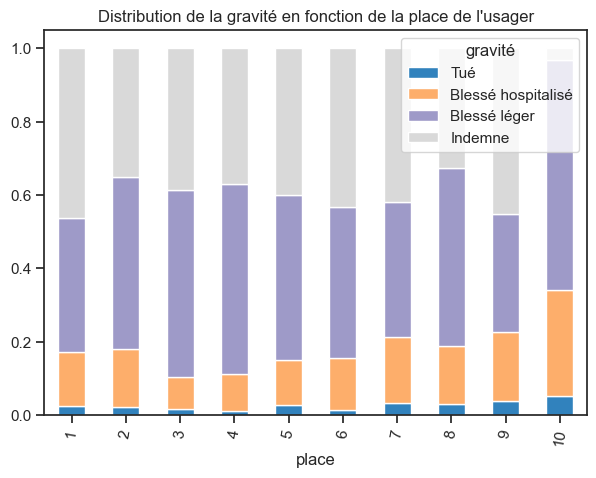

In [4]:
df_cross = pd.crosstab(df['place'], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title="Distribution de la gravité en fonction de la place de l'usager", colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation Gravité - Catégorie d'utilisateur (*catu*)

gravité                       Tué  Blessé hospitalisé  Blessé léger   Indemne
catégorie d'utilisateur                                                      
Conducteur               0.024842            0.148338      0.365164  0.461656
Passager                 0.021876            0.147359      0.464908  0.365856
Piéton                   0.051559            0.290792      0.624773  0.032876





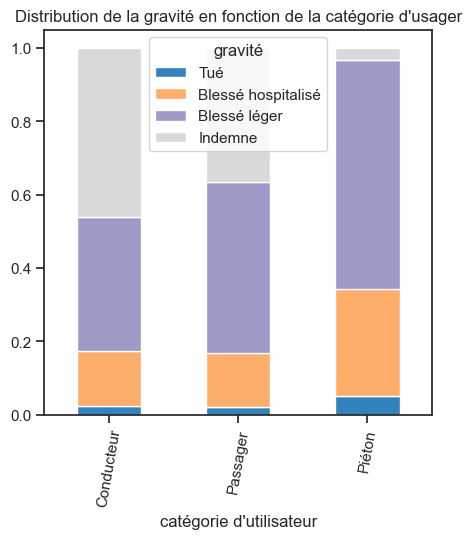

In [5]:
df_cross = pd.crosstab(df["catégorie d'utilisateur"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

print("\n\n")

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(5, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                         title="Distribution de la gravité en fonction de la catégorie d'usager", colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper center")

## Relation gravité - sexe (*sexe*)

gravité        Tué  Blessé hospitalisé  Blessé léger   Indemne
sexe_lbl                                                      
Féminin   0.018028            0.142218      0.472120  0.367634
Masculin  0.030197            0.167062      0.372216  0.430525
sexe_lbl             Féminin  Masculin
gravité                               
Blessé hospitalisé  0.278390  0.721610
Blessé léger        0.365008  0.634992
Indemne             0.279012  0.720988
Tué                 0.212950  0.787050


C:\Users\nicol\AppData\Local\Temp\ipykernel_9652\1088303671.py:25: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_cross.to_excel("C:\\Users\\nicol\\git\\projet-accidents-routiers\\output.xls")


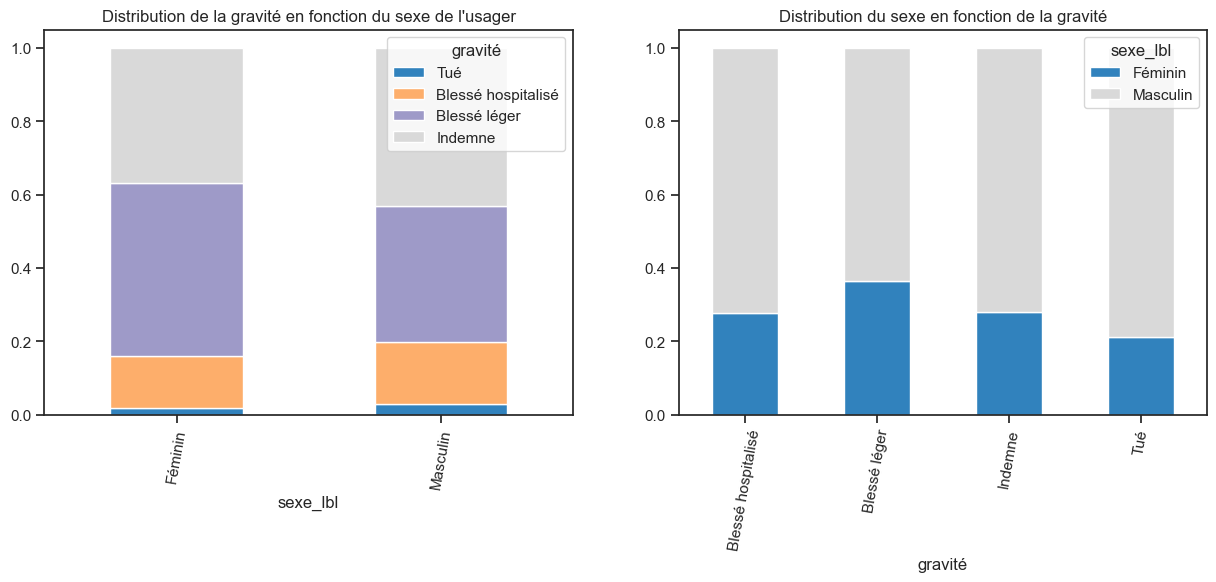

In [15]:
df_cross_1 = pd.crosstab(df["sexe_lbl"], df['gravité'], normalize='index')
df_cross_1 = df_cross_1.reindex(columns=columns_titles)
print(df_cross_1)

df_cross_2 = pd.crosstab( df['gravité'], df["sexe_lbl"], normalize='index')
# df_cross_2 = df_cross_2.reindex(columns=columns_titles)
print(df_cross_2)


sns.set_theme(style="ticks")
# f, ax = plt.subplots(figsize=(7, 5))
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15,5)

chart = df_cross_1.plot(kind="bar", stacked=True, rot=0, ax=axs[0], 
                        title="Distribution de la gravité en fonction du sexe de l'usager", colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(axs[0], "upper right")

chart = df_cross_2.plot(kind="bar", stacked=True, rot=0, ax=axs[1], 
                         title="Distribution du sexe en fonction de la gravité", colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(axs[1], "upper right")

df_cross.to_excel("C:\\Users\\nicol\\git\\projet-accidents-routiers\\output.xls")

## Relation Gravité - Age ( f(*an_nais*) )

gravité            Tué  Blessé hospitalisé  Blessé léger   Indemne
classe d'age                                                      
0-25          0.021687            0.174710      0.476136  0.327467
26-37         0.020898            0.134482      0.418002  0.426618
38-53         0.020397            0.132010      0.381647  0.465946
>53           0.042747            0.196222      0.335742  0.425289


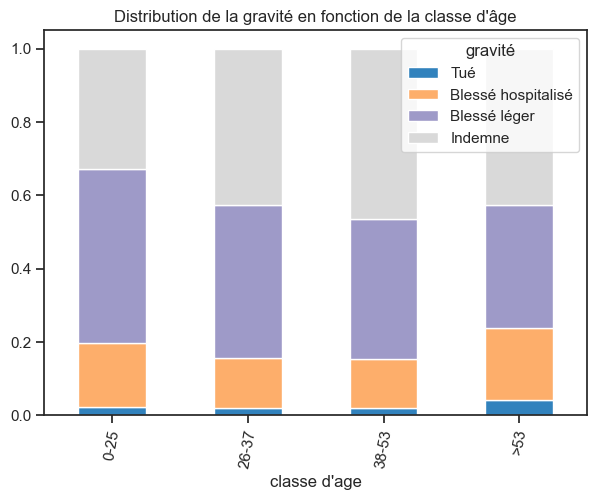

In [7]:
df_cross = pd.crosstab(df["classe d'age"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                      title="Distribution de la gravité en fonction de la classe d'âge", colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation gravité - motif du déplacement (*trajet*)

Empty DataFrame
Columns: [Tué, Blessé hospitalisé, Blessé léger, Indemne]
Index: []


IndexError: index 0 is out of bounds for axis 0 with size 0

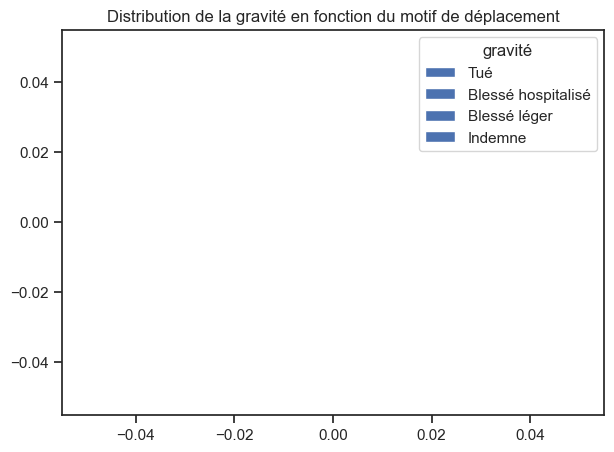

In [8]:
df_cross = pd.crosstab(df["trajet_lbl"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                      title="Distribution de la gravité en fonction du motif de déplacement", colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation gravité - équipement de sécurité

In [ ]:
df_cross1 = pd.crosstab(df["secu1_lbl"], df['gravité'], normalize='index')
df_cross1 = df_cross1.reindex(columns=columns_titles)
# print(df_cross1)
df_cross2 = pd.crosstab(df["secu2_lbl"], df['gravité'], normalize='index')
df_cross2 = df_cross2.reindex(columns=columns_titles)
# print(df_cross2)
df_cross3 = pd.crosstab(df["secu3_lbl"], df['gravité'], normalize='index')
df_cross3 = df_cross3.reindex(columns=columns_titles)
# print(df_cross3)


sns.set_theme(style="ticks")
f, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True)
f.set_size_inches(15, 15)

chart = df_cross1.plot(kind="bar", stacked=True, rot=0, ax=ax1, 
                       title="Distribution de la gravité en fonction de l'équipement de sécurité 1", colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax1, "upper right")

chart = df_cross2.plot(kind="bar", stacked=True, rot=0, ax=ax2, 
                       title="Distribution de la gravité en fonction de l'équipement de sécurité 2", colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax2, "upper right")

chart = df_cross3.plot(kind="bar", stacked=True, rot=0, ax=ax3, 
                       title="Distribution de la gravité en fonction de l'équipement de sécurité 3", colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax3, "upper right")


## Relation gravité - localisation du piéton (*locp*)

In [ ]:
df_cross = pd.crosstab(df["locp_lbl"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                      title="Distribution de la gravité en fonction de la localisation du piéton", colormap='tab20c')
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation gravité - action du piéton (*actp*)

In [ ]:
df_cross = pd.crosstab(df["actp_lbl"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                      title="Distribution de la gravité en fonction de l'action du piéton'", colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

## Relation gravité - Piéton seul ou non (*etatp*)

In [ ]:
df_cross = pd.crosstab(df["etatp_lbl"], df['gravité'], normalize='index')
df_cross = df_cross.reindex(columns=columns_titles)
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                      title="Distribution de la gravité en fonction de l'entourage du piéton", colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")